## Interpolation and Extrapolation

In [109]:
import numpy as np
import matplotlib.pyplot as plt


[0.05670112 0.05705179 0.05741443 0.05776549 0.05811596 0.05846591
 0.05881604 0.0591663  0.05951607 0.05986541]
65 10290


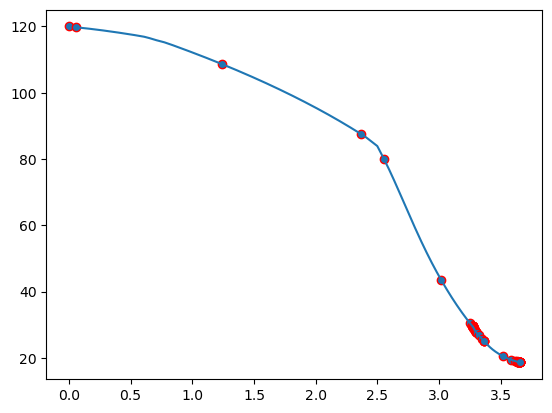

In [110]:
fname = '120a300.fis'
fname1 ='evol_120msun_scattered.dat'
time,mass = np.loadtxt(fname, dtype='float', comments='#', delimiter=None,  usecols=(0,7), unpack= True)
time = time*10**(-6)
print(time[:10])

time1,mass1 =np.loadtxt(fname1, dtype='float', comments='#', delimiter=None,  usecols=(0,1), unpack= True)
print(len(mass1),len(mass))
plt.plot(time,mass)
plt.scatter(time1,mass1,edgecolors='red')

[0.05670112 0.05705179 0.05741443 ... 3.6531652  3.6531652  3.6531652 ]


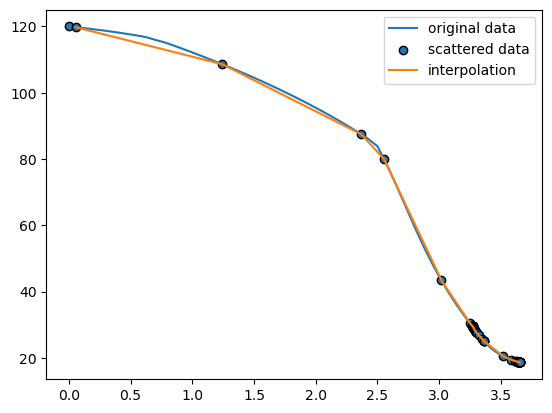

In [126]:
print(time)

############# interpolation ###############
mass_interpolate = []
for t in time:
    i = np.searchsorted(time1,t)-1
    mb,ma = mass1[i+1],mass1[i]
    tb,ta = time1[i+1],time1[i]
    m = ma + (t- ta)*(mb-ma)/(tb-ta)
    mass_interpolate.append(m)
    
    
#     m = ((time[i] -t)*mass[i-1] + (t - time[i-1])*mass[i])/(time[i] - time[i])  
#     print(m)
#     mass_interpolate.append(m)
plt.plot(time,mass,label = 'original data')
plt.scatter(time1,mass1,edgecolors='black',label='scattered data')
plt.plot(time,mass_interpolate, label = 'interpolation')
plt.legend()

-1
25
2
9
3
16
3


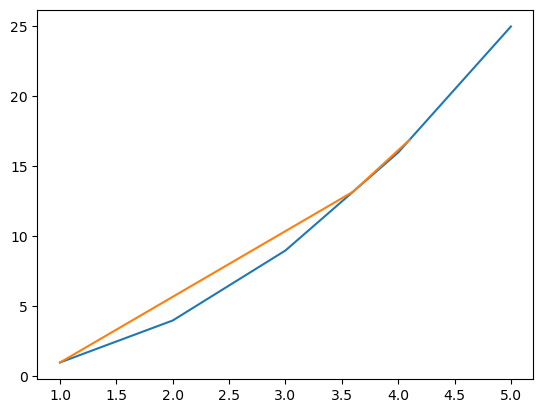

In [104]:

import numpy as np

# Define the x and y data points
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x,y)
# Define the array of x values for which the interpolated y values are required
x_new = [1, 3.6, 4.1]

# Initialize an empty list to store the interpolated y values
y_interp = []

for val in x_new:
    i = np.searchsorted(x, val) - 1
    print(i)
    print(y[i])
    y0, y1 = y[i], y[i+1]
    x0, x1 = x[i], x[i+1]
    y_interp.append(y0 + (val - x0) * (y1 - y0) / (x1 - x0))

print(len(y_interp))
plt.plot(x_new,y_interp)


In [130]:
def data_set():
    a=0.
    s=1.
    h=10.
    x=np.linspace(-10.,10.,num=500) #x data
    y=h*np.exp(-(x-a)**2/2./s**2)
    sigma=np.zeros(len(x),float)
    for i in range(len(y)):
        sigma[i]=4.*rnd.random()
        y[i]=rnd.normal(y[i],sigma[i]) #add gaussian noise
    return x,y